## **Вопросы**

#### 1. Как хорошо Вы владеете Python?

**7/10**

Я хорошо владею Python: уверенно пользуюсь pandas, numpy, использую библиотеки визуализации - plotly, seaborn, и matplotlib, разбираюсь в кодировании и отбором признаков (обычно использую SelectKBest), разбираюсь в масштабировании данных с помощью нормализации и стандартизации, применяю в работе ML алгоритмы: обучение с учителем (линейная / логистическая регрессия, случайный лес), а также разбираюсь в отборе гиперпараметров (предпочитаю библиотеку optuna).

Не скажу, что пишу весь код по памяти, но умею разбирать ошибки и часто пользуюсь Stackoverflow, если есть вопросы, и обычно без дополнительной помощи могу решить проблему.

#### 2. Насколько хорошо Вы знакомы с Google Sheets?

**8/10**

Уверенно владею Microsoft Excel и Google Sheets: самостоятельно пишу формулы для преобразования данных и вычислений, пользуюсь сводными таблицами, разбираюсь в Power Query, умею строить графики.

Мало использовала macros в работе, но могу разобраться с кодом при необходимости.

## **Техническое Задание**

In [1]:
#standard libraries
import pandas as pd, numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

Имеющиеся поля:

● client_id - ID клиента; \
● sum – сумма денежных средств; \
● status – статус оплаты; \
● sale – менеджер, заключивший сделку; \
● new/current – статус сделки; \
● document – наличие оригинала подписанного договора с клиентом; \
● receiving_date – дата получения оригинала договора.

In [2]:
#import the data set
test_data = pd.read_excel('data/data.xlsx')

#display the data set
test_data.head(3)

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00


In [3]:
#dimensions
test_data.shape

(730, 8)

##### create the missing feature

In [4]:
#find the index of each monthly report
display(test_data[test_data['status'] == 'Май 2021'].index)
display(test_data[test_data['status'] == 'Июнь 2021'].index)
display(test_data[test_data['status'] == 'Июль 2021'].index)
display(test_data[test_data['status'] == 'Август 2021'].index)
display(test_data[test_data['status'] == 'Сентябрь 2021'].index)
display(test_data[test_data['status'] == 'Октябрь 2021'].index)

Index([0], dtype='int64')

Index([129], dtype='int64')

Index([258], dtype='int64')

Index([369], dtype='int64')

Index([484], dtype='int64')

Index([594], dtype='int64')

In [5]:
#create a new feature: index
test_data['id'] = test_data.index

#create a new feature: report_month
test_data['report_month'] = None

In [6]:
#create a function to assign the relevant report month to a list of relevant records
def assign_month(row):
    #assign for May
    if 0 <= row['id'] <= 128:
        return 5
    #assign for June
    elif 129 <= row['id'] <= 257:
        return 6
    #assign for July
    elif 258 <= row['id'] <= 368:
        return 7
    #assign for August
    elif 369 <= row['id'] <= 483:
        return 8
    #assign for September
    elif 484 <= row['id'] <= 593:
        return 9
    #assign for October
    elif row['id'] >= 594:
        return 10
    #in case of errors
    else:
        return None

In [7]:
#apply the function to each record
test_data['report_month'] = test_data.apply(assign_month,
                                            axis=1)

##### remove duplicates

In [8]:
#find any duplicates
dupl_columns = list(test_data.columns)
dupl_columns.remove('id')

mask = test_data.duplicated(subset=dupl_columns)
test_duplicates = test_data[mask]
print(f'Number of Duplicates: {test_duplicates.shape[0]}')

Number of Duplicates: 14


In [9]:
#create a new table free of duplicates
test_data = test_data.drop_duplicates(subset=dupl_columns)
print(f'New Dimensions: {test_data.shape}')

New Dimensions: (716, 10)


##### transform null values

In [10]:
#check for null values
test_data.isnull().sum()[test_data.isnull().sum() > 0]

client_id           6
sum                 6
sale                6
new/current         6
Unnamed: 5        716
document           21
receiving_date    121
dtype: int64

In [11]:
#drop unnecessary features
test_data = test_data.drop(['Unnamed: 5', 'id'],
                           axis=1,
                           errors='ignore')

In [12]:
#investigate the feature: status
test_data['status'].value_counts()

status
ОПЛАЧЕНО         608
ПРОСРОЧЕНО        52
В РАБОТЕ          44
НА ПОДПИСАНИИ      5
Май 2021           1
ВНУТРЕННИЙ         1
Июнь 2021          1
Июль 2021          1
Август 2021        1
Сентябрь 2021      1
Октябрь 2021       1
Name: count, dtype: int64

In [13]:
#create a mask
display(test_data[test_data['status'] == 'Май 2021'])
display(test_data[test_data['status'] == 'ВНУТРЕННИЙ'])

,client_id,sum,status,sale,new/current,document,receiving_date,report_month
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,5


,client_id,sum,status,sale,new/current,document,receiving_date,report_month
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,5


In [14]:
#drop records with more than 2 null values
m = test_data.shape[1]
test_data = test_data.dropna(thresh=m-2,
                             axis=0)

In [15]:
#delete any record / row with status as 'ВНУТРЕННИЙ'
test_data = test_data[~(test_data['status'] == 'ВНУТРЕННИЙ') == True]

In [16]:
#check for null values
test_data.isnull().sum()[test_data.isnull().sum() > 0]

document           15
receiving_date    115
dtype: int64

In [17]:
#investigate the feature: document
test_data['document'].value_counts()

document
оригинал    583
НЕТ         111
Name: count, dtype: int64

In [18]:
#any null values replace with 0
test_data['document'] = test_data['document'].fillna('НЕТ')

In [19]:
#check for null values
test_data.isnull().sum()[test_data.isnull().sum() > 0]

receiving_date    115
dtype: int64

leave receiving date with blanks for now

##### assign correct data types

In [20]:
#find the basic information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 2 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       709 non-null    float64
 1   sum             709 non-null    float64
 2   status          709 non-null    object 
 3   sale            709 non-null    object 
 4   new/current     709 non-null    object 
 5   document        709 non-null    object 
 6   receiving_date  594 non-null    object 
 7   report_month    709 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 49.9+ KB


In [21]:
#convert the data types
test_data['client_id'] = test_data['client_id'].to_numpy('int16')
test_data['sum'] = test_data['sum'].to_numpy('float64')
test_data['status'] = test_data['status'].astype('string')
test_data['sale'] = test_data['sale'].astype('string')
test_data['new/current'] = test_data['new/current'].astype('string')
test_data['document'] = test_data['document'].astype('string')
test_data['report_month'] = test_data['report_month'].to_numpy('int8')

In [22]:
#convert to datetime
test_data['receiving_date'] = pd.to_datetime(test_data['receiving_date'],
                                             errors='coerce')

In [23]:
#create new columns for dates
test_data['day'] = test_data['receiving_date'].dt.day
test_data['month'] = test_data['receiving_date'].dt.month
test_data['year'] = test_data['receiving_date'].dt.year

In [24]:
#convert the data types
test_data['day'] = test_data['day'].to_numpy('int8')
test_data['month'] = test_data['month'].to_numpy('int8')
test_data['year'] = test_data['year'].to_numpy('int16')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/base.py:662: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(values, dtype=dtype)


#### 1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

just one year = 2021, so no need to additionally filter

In [25]:
#filter by status other than overdue / просрочен
non_overdue = test_data[(~(test_data['status'] == 'ПРОСРОЧЕНО') == True) & (test_data['report_month'] == 7)]

#average sale for july
print(f"Общай Выручка за Июль: \n {round(non_overdue['sum'].mean(), 2)}")

Общай Выручка за Июль: 
 8037.86


#### 2. Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

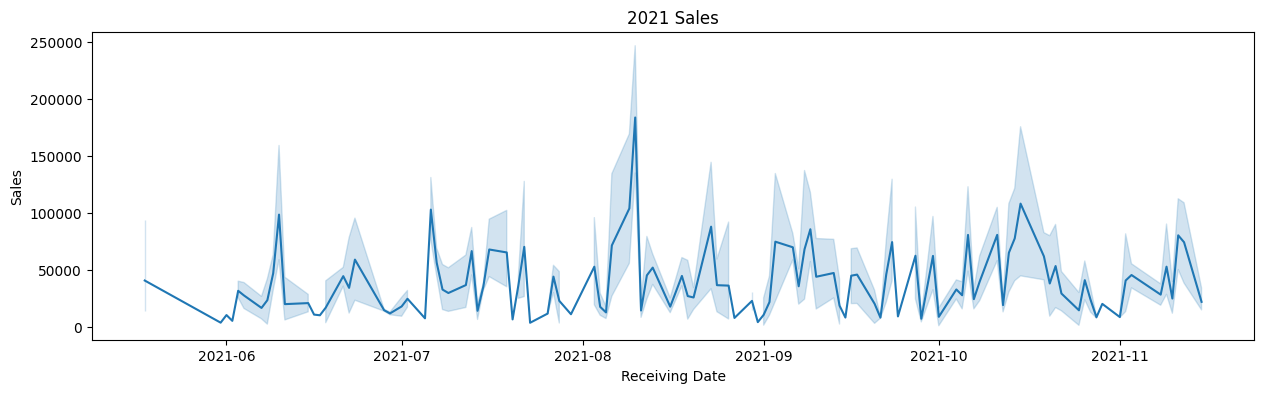

In [26]:
#set the canvas
plt.figure(figsize=(15, 4))

#create a line graph
sns.lineplot(data=test_data,
             x='receiving_date',
             y='sum',
             estimator=sum,
             ).set(title='2021 Sales',
                   xlabel='Receiving Date',
                   ylabel='Sales');

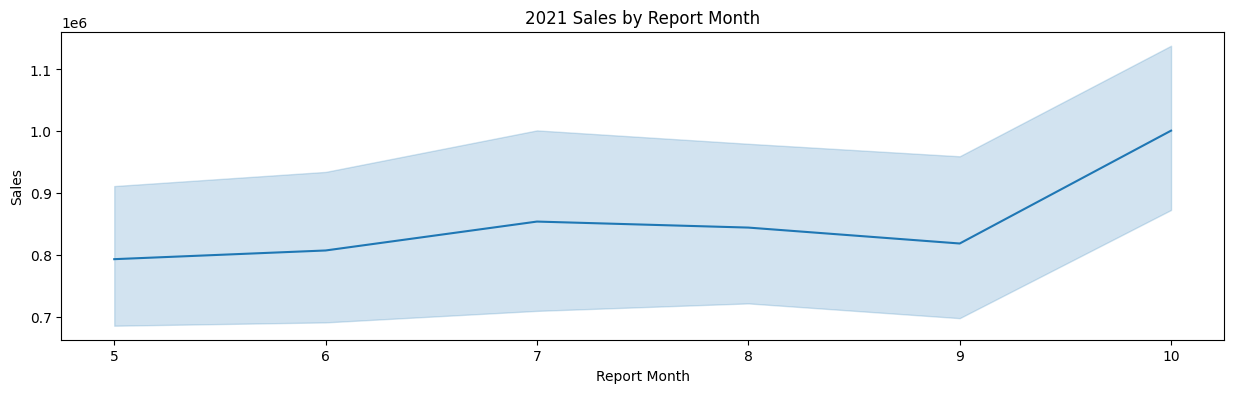

In [27]:
#set the canvas
plt.figure(figsize=(15, 4))

#create a line graph
sns.lineplot(data=test_data,
             x='report_month',
             y='sum',
             estimator=sum,
             ).set(title='2021 Sales by Report Month',
                   xlabel='Report Month',
                   ylabel='Sales');

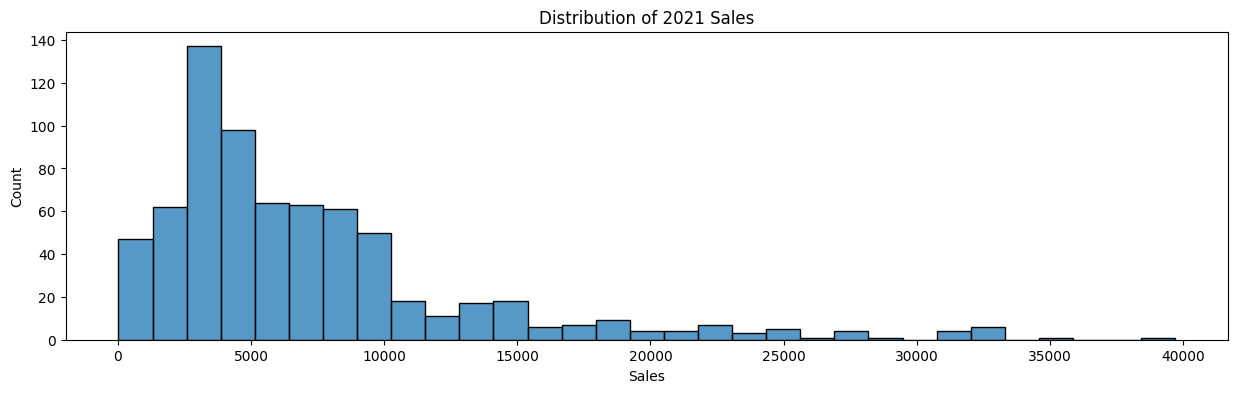

In [28]:
#set the canvas
plt.figure(figsize=(15, 4))

#create a histogram
sns.histplot(data=test_data,
             x='sum'
            ).set(title='Distribution of 2021 Sales',
                  xlabel='Sales');

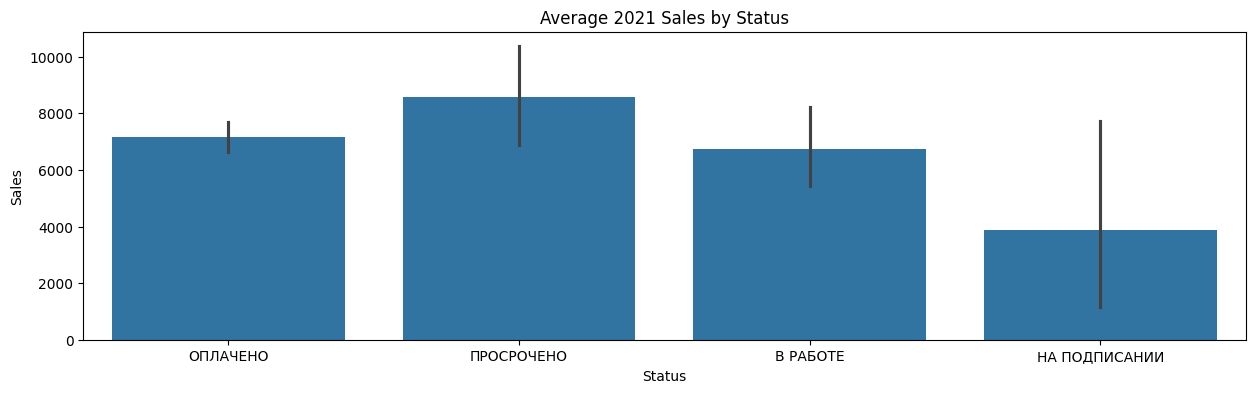

In [29]:
#set the canvas
plt.figure(figsize=(15, 4))

#create a bar chart
sns.barplot(test_data,
            x='status',
            y='sum').set(title='Average 2021 Sales by Status',
                         xlabel='Status',
                         ylabel='Sales');

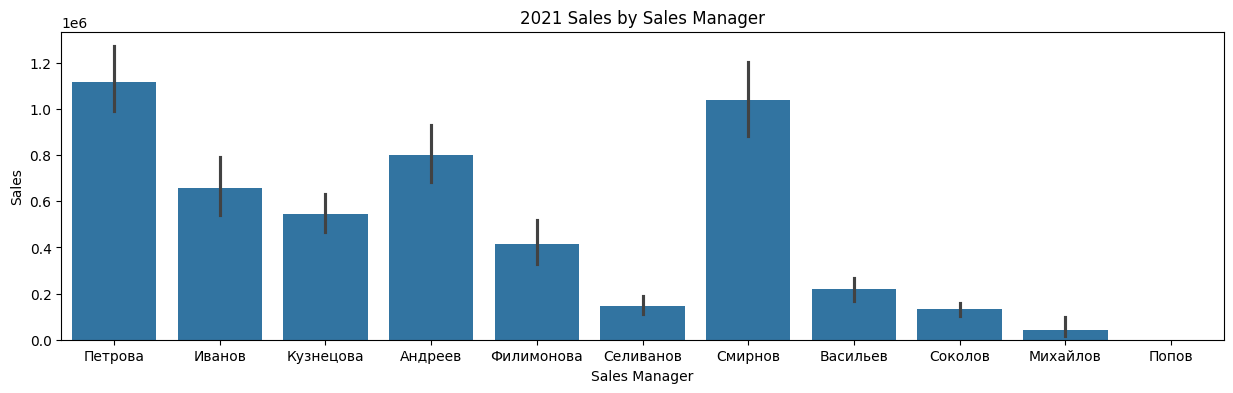

In [30]:
#set the canvas
plt.figure(figsize=(15, 4))

#create a bar chart
sns.barplot(test_data,
            x='sale',
            y='sum',
            estimator=sum).set(title='2021 Sales by Sales Manager',
                         xlabel='Sales Manager',
                         ylabel='Sales'
                         );

#### 3. Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [31]:
#filter by september sales only
september_data = test_data[test_data['report_month'] == 9]

In [32]:
#sort by average
september_data.groupby(by='sale')['sum'].mean().round().sort_values(ascending=False).nlargest(3)

sale
Иванов      8616.0
Смирнов     8487.0
Васильев    8316.0
Name: sum, dtype: float64

In [33]:
#sort by max
september_data.groupby(by='sale')['sum'].max().round().sort_values(ascending=False).nlargest(3)

sale
Смирнов       32498.0
Иванов        27163.0
Филимонова    25054.0
Name: sum, dtype: float64

In [34]:
#sort by total
september_data.groupby(by='sale')['sum'].sum().round().sort_values(ascending=False).nlargest(3)

sale
Смирнов    220672.0
Петрова    149344.0
Андреев    132646.0
Name: sum, dtype: float64

In [35]:
print(f"Больше денежных средств в сентябре принес: \n {september_data.groupby(by='sale')['sum'].sum().round().sort_values(ascending=False).nlargest(3).index[0]}")

Больше денежных средств в сентябре принес: 
 Смирнов


#### 4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [36]:
#filter by october sales only
october_data = test_data[test_data['report_month'] == 10]

In [37]:
#sort by total
october_data.groupby(by='new/current')['sum'].sum().round().sort_values(ascending=False)

new/current
текущая    758649.0
новая      242415.0
Name: sum, dtype: float64

In [38]:
print(f"Преобладающий Тип Сделок за Октябрь: {october_data.groupby(by='new/current')['sum'].sum().round().sort_values(ascending=False).index[0].capitalize()}")

Преобладающий Тип Сделок за Октябрь: Текущая


#### 5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [39]:
#filter by report month, receiving month, and document type
may_by_june = test_data[(test_data['report_month'] == 5) & (test_data['month'] == 6) & (test_data['document'] == 'оригинал')]

print(f"Количество оригиналов договора по майским сделкам, полученных в июне: {may_by_june['client_id'].count()}")

Количество оригиналов договора по майским сделкам, полученных в июне: 76


## **Задание**

За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом:

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце).

In [40]:
#create a function to assign a bonus to a sale manager based on the criteria specified
def assign_bonus(x: pd.DataFrame):
    #assign condition 1
    if x['new/current'] == 'новая':
        #documents received in the same report month
        if (x['status'] == 'ОПЛАЧЕНО') and (x['document'] == 'оригинал') and (x['report_month'] == x['month']):
            return round(0.07 * x['sum'], 2)
    
    #assign condition 2
    elif x['new/current'] == 'текущая':
        #condition 2(a)
        #documents received in the same report month
        if (x['sum'] > 10000) and (x['status'] != 'ПРОСРОЧЕНО') and (x['document'] == 'оригинал') and (x['report_month'] == x['month']):
            return round(0.05 * x['sum'], 2)
        
        #condition 2(b)
        #documents received in the same report month
        elif (x['sum'] < 10000) and (x['status'] != 'ПРОСРОЧЕНО') and (x['document'] == 'оригинал') and (x['report_month'] == x['month']):
            return round(0.03 * x['sum'], 2)
    
    #for all other possibilities
    else:
        return 0

In [41]:
#create a new column by applying the function
test_data['bonus'] = test_data.apply(assign_bonus,
                                     axis=1)

In [42]:
#any null values replace with 0
test_data['bonus'] = test_data['bonus'].fillna(0)

In [43]:
#create a function to assign a bonus to a sale manager based on the criteria specified
def assign_late_bonus(x: pd.DataFrame):
    #assign condition 1
    if x['new/current'] == 'новая':
        #documents received post report month
        if (x['status'] == 'ОПЛАЧЕНО') and (x['document'] == 'оригинал') and (x['report_month'] != x['month']):
            return round(0.07 * x['sum'], 2)
    
    #assign condition 2
    elif x['new/current'] == 'текущая':
        #condition 2(a)
        #documents received post report month
        if (x['sum'] > 10000) and (x['status'] != 'ПРОСРОЧЕНО') and (x['document'] == 'оригинал') and (x['report_month'] != x['month']):
            return round(0.05 * x['sum'], 2)
        
        #condition 2(b)
        #documents received post report month
        elif (x['sum'] < 10000) and (x['status'] != 'ПРОСРОЧЕНО') and (x['document'] == 'оригинал') and (x['report_month'] != x['month']):
            return round(0.03 * x['sum'], 2)
    
    #for all other possibilities
    else:
        return 0

In [44]:
#create a new column by applying the function
test_data['late_bonus'] = test_data.apply(assign_late_bonus,
                                          axis=1)

In [45]:
#any null values replace with 0
test_data['late_bonus'] = test_data['late_bonus'].fillna(0)

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по мере прихода оригиналов. \
Вычислите остаток каждого из менеджеров на 01.07.2021.

In [46]:
#filter by receiving date
july_remainder = test_data[(test_data['month'] == 7) & (test_data['day'] == 1)]

#find the remainder by sale manager
july_remainder.groupby(by='sale')['late_bonus'].sum()

sale
Андреев     44.21
Иванов     212.66
Смирнов    140.79
Name: late_bonus, dtype: float64